# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# In'https://pypi.python.org/pypi/corporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Build partial query URL

url_query = f"{url}appid={weather_api_key}&units={units}&q="

#initialize lists
country =[]
cloudiness = []
humidity = []
date = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_list = []

print('Data Retrieval Start')
print('-------------')
counter = 1
nb_tries = 10 

#Loop through cities and request city data

for city in cities:
    city_data = url_query + city.replace(' ', '+')
    response = requests.get(city_data)
    print(f'Processing Record {counter} | {city}')
    print (city_data)
          
    try:
        response.raise_for_status()
        data = response.json()
#print (data) to check the key structure
        time.sleep(1)
        city_list.append(city)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])      
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])    
        wind_speed.append(data['wind']['speed']) 
    except requests. exceptions. HTTPError as e:
        print ('No such city. skipping....')
        print (str(e))
    except ConnectionError as err:
        if  nb_tries == 0:
            raise err
        else:
            time.sleep(1)
    counter +=1
    nb_tries -=1
          
print ('------------')
print ('Data Retrieval Complete')          


           
          
        


Data Retrieval Start
-------------
Processing Record 1 | teahupoo
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=teahupoo
Processing Record 2 | sibanicu
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=sibanicu
Processing Record 3 | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=okhotsk
Processing Record 4 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=bredasdorp
Processing Record 5 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=lagoa
Processing Record 6 | puerto carreno
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=puerto+carreno
Processing Record 7 | paracuru
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b

Processing Record 54 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=husavik
Processing Record 55 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=norman+wells
Processing Record 56 | burns lake
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=burns+lake
Processing Record 57 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=torbay
Processing Record 58 | pimentel
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=pimentel
Processing Record 59 | ciras
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=ciras
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b9842

Processing Record 109 | paarl
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=paarl
Processing Record 110 | oudtshoorn
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=oudtshoorn
Processing Record 111 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=ponta+do+sol
Processing Record 112 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=avarua
Processing Record 113 | lolua
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=lolua
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=lolua
Processing Record 114 | singkawang
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b984

Processing Record 163 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=qaanaaq
Processing Record 164 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=alta+floresta
Processing Record 165 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=karratha
Processing Record 166 | salalah
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=salalah
Processing Record 167 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=abu+dhabi
Processing Record 168 | rapar
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=rapar
Processing Record 169 | east london
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=eas

Processing Record 211 | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=klaksvik
Processing Record 212 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=umzimvubu
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=umzimvubu
Processing Record 213 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=ribeira+grande
Processing Record 214 | milkovo
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=milkovo
Processing Record 215 | changji
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=changji
Processing Record 216 | price
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3f

Processing Record 259 | butte
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=butte
Processing Record 260 | muros
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=muros
Processing Record 261 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=thompson
Processing Record 262 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=hambantota
Processing Record 263 | mitu
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=mitu
Processing Record 264 | chatham
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=chatham
Processing Record 265 | killarney
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=killarney
Processing Reco

Processing Record 312 | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=haines+junction
Processing Record 313 | baoma
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=baoma
Processing Record 314 | mwingi
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=mwingi
Processing Record 315 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=yerbogachen
Processing Record 316 | bac lieu
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=bac+lieu
Processing Record 317 | mbandaka
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=mbandaka
Processing Record 318 | devrek
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=

Processing Record 366 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=lorengau
Processing Record 367 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=vanimo
Processing Record 368 | fort pierce
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=fort+pierce
Processing Record 369 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=bethel
Processing Record 370 | sorland
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=sorland
Processing Record 371 | moctezuma
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=moctezuma
Processing Record 372 | broome
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=broome
Proce

Processing Record 420 | san joaquin
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=san+joaquin
Processing Record 421 | zyryanka
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=zyryanka
Processing Record 422 | jiaocheng
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=jiaocheng
Processing Record 423 | huilong
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=huilong
Processing Record 424 | chimbote
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=chimbote
Processing Record 425 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=plettenberg+bay
Processing Record 426 | moron
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=

Processing Record 472 | arlit
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=arlit
Processing Record 473 | paradwip
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=paradwip
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=paradwip
Processing Record 474 | tabiauea
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=tabiauea
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=tabiauea
Processing Record 475 | palestine
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=palestine
Processing Record 476 | cheuskiny
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 526 | arkhipo-osipovka
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=arkhipo-osipovka
Processing Record 527 | saint anthony
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=saint+anthony
Processing Record 528 | satitoa
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=satitoa
No such city. skipping....
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=satitoa
Processing Record 529 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=pangnirtung
Processing Record 530 | mchinji
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=mchinji
Processing Record 531 | bucerias
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 578 | hoi an
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=hoi+an
Processing Record 579 | ust-ishim
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=ust-ishim
Processing Record 580 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=richards+bay
Processing Record 581 | lucea
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=lucea
Processing Record 582 | chlorakas
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=chlorakas
Processing Record 583 | tres arroyos
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q=tres+arroyos
Processing Record 584 | bubaque
http://api.openweathermap.org/data/2.5/weather?appid=05c172322d5663e3ffe5dcc860b98426&units=metric&q

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#create panda dataframe for new data
city_dictionary = pd.DataFrame({'Country':country,
                 'Cloudiness':cloudiness,
                 'Humidity':humidity,
                 'Date':date,
                 'Latitude':lat,
                 'Longitude':lng,
                 'Max Temp': max_temp,
                 'Wind Speed':wind_speed,
                 'City':city_list})
#count dictionary
city_dictionary.count()

Country       563
Cloudiness    563
Humidity      563
Date          563
Latitude      563
Longitude     563
Max Temp      563
Wind Speed    563
City          563
dtype: int64

In [18]:
#Display Data Frame
city_dictionary 

,Country,Cloudiness,Humidity,Date,Latitude,Longitude,Max Temp,Wind Speed,City
0,PF,20,66,1616289790,-17.8333,-149.2667,31.00,5.66,teahupoo
1,CU,20,83,1616289997,21.2350,-77.5264,23.00,3.09,sibanicu
2,RU,90,86,1616289999,59.3833,143.3000,-10.85,3.01,okhotsk
3,ZA,97,94,1616290000,-34.5322,20.0403,14.00,1.03,bredasdorp
4,PT,100,78,1616289638,39.0500,-27.9833,14.30,6.34,lagoa
...,...,...,...,...,...,...,...,...,...
558,NO,90,93,1616290736,69.2408,19.2344,-2.00,8.75,storsteinnes
559,TR,0,87,1616290737,38.1667,32.5000,2.00,2.06,konya
560,UY,100,96,1616290739,-34.4833,-54.3333,19.56,2.93,rocha
561,US,90,69,1616290740,21.4022,-157.7394,26.00,9.26,kailua


In [19]:
city_dictionary.describe()

,Cloudiness,Humidity,Date,Latitude,Longitude,Max Temp,Wind Speed
count,563.000000,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000
mean,50.689165,71.854352,1.616290e+09,21.282263,13.535518,12.014636,3.742007
std,41.236852,20.925986,2.733581e+02,33.344327,90.490068,14.622619,2.756262
min,0.000000,8.000000,1.616289e+09,-54.800000,-179.166700,-37.200000,0.040000
25%,1.000000,62.000000,1.616290e+09,-6.479200,-68.407250,3.330000,1.645000
50%,57.000000,77.000000,1.616290e+09,25.291900,19.916700,16.000000,3.080000
75%,90.000000,88.000000,1.616291e+09,49.899850,89.093450,23.935000,5.000000
max,100.000000,100.000000,1.616291e+09,78.218600,178.416700,32.000000,18.520000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

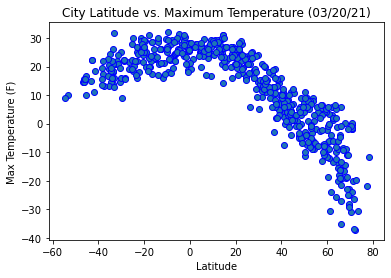

In [11]:
plt.scatter(city_dictionary['Latitude'],
            city_dictionary['Max Temp'],
            edgecolor= 'blue', linewidths=1, marker='o',
            alpha =1.0, label = "Cities")

#include other graph properties
plt.title('City Latitude vs. Maximum Temperature (%s)'
          % time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')


#save as .png
plt.savefig('Latitude vs Temperature (F).png')

## Latitude vs. Humidity Plot



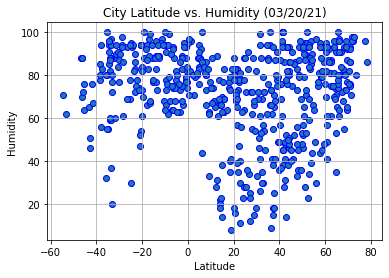

In [12]:
#Latitude vs. Humidity

plt.scatter(city_dictionary['Latitude'],
            city_dictionary['Humidity'],
            edgecolor= 'blue', linewidths=1, marker='o',
            alpha =1.0, label = "Cities")

#include other graph properties
plt.title('City Latitude vs. Humidity (%s)'
          % time.strftime("%x"))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

#save as .png
plt.savefig('Latitude vs Humidity.png')

## Latitude vs. Cloudiness Plot

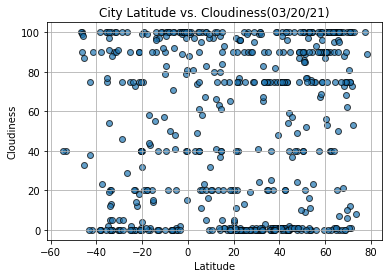

In [13]:
plt.scatter(city_dictionary['Latitude'],
            city_dictionary['Cloudiness'],
            edgecolor='black', linewidths=1, marker='o',
            alpha =0.7, label = "Cities")

#include other graph properties
plt.title('City Latitude vs. Cloudiness(%s)'
          % time.strftime("%x"))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

#save as .png
plt.savefig('Latitude vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

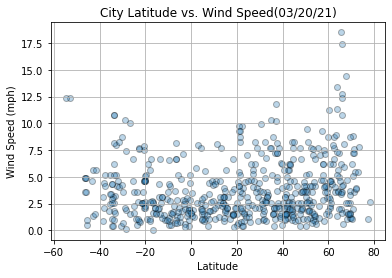

In [14]:
plt.scatter(city_dictionary['Latitude'],
            city_dictionary['Wind Speed'],
            edgecolor='black', linewidths=1, marker='o',
            alpha =0.3, label = "Cities")

#include other graph properties
plt.title('City Latitude vs. Wind Speed(%s)'
          % time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save as .png
plt.savefig('Latitude vs Wind Speed.png')

## Linear Regression

In [34]:
# Create Northern/Southern Hemisphere DataFrame
n_hemi = city_dictionary.loc[city_dictionary['Latitude']>=0]
s_hemi = city_dictionary.loc[city_dictionary['Latitude']<0]

#Define function for linear regression and scatter plot
def linear_regression(x,y):
    print(f'The r-squared is:{round(st.pearsonr(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, st.derr) = linregress(x, y)
    linear_reg_values = x*slope +intercept
    linear_equation = 'y ='+ str(round(slope,2))+ 'x +'
    +str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values, 'r-')
    return line_eq
#define function annotate
def annontate (linear_equation, a, b):
    plt.annotate(linear_equation,(a,b), fontsize=15, color= yellow)
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
#Function #1
eq = linear_regression(n_hemi['Latitude'],n_hemi['Max Temp'])

#Function #2
annonate(eq, 0, 0)

#create title
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

#Set xlabel
plt.xlabel('Latitude')

#Set ylabel
plt.ylabel ('Max Temp (F)')

#Save as .png
plt.savefig('Northern Hemisphere-Max Temp vs. Latutude Linear Regreassion.png')


NameError: name 'pearsonr' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
#Call function 1
eq = linear_regression(s_hemi['Latitude'], s_hemi['Max Temp'])

#call function 2
annotate(eq, -30, 50)

#set a title
plt.title('Southern Hemisphere- Max Temp vs. Latitude Linear Regression')

#set xlabel
plt.xlable ('Latitude')

#set ylabel
plt.ylabel('Max Temp (F)')

#save
plt.savefig('Southern Hemisphere- Max Temp vs. Latitude Linear Regression.png')

NameError: name 'st' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression